**Group Members**
* ARVIN YUWONO           / 2502009721
* CHRISTOPHER OWEN       / 2502019180
* KENNETH SAMUEL DJASMIN / 2502009620


---



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load dataset
url = 'https://raw.githubusercontent.com/Gitroars/FoDS_LEC/main/FoDS_w5/toy_dataset.csv'
df_toy = pd.read_csv(url)
df_toy

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [ ]:
df_toyill = df_toy.iloc[100:151, [0,1,2,3,4,5]]
feature_cols=['City','Gender','Age','Income']
X = df_toyill[feature_cols] # Features
y = df_toyill['Illness'] # Target variable

In [ ]:
#OOps... the sklearn DecisionTreeClassifier() doesn't work on categorical data, let's do some encoding
# X['Outlook']= X['Outlook'].replace({'Rain':30, 'Sunny':20, 'Overcast':10}, inplace=False)
# X['Temperature']= X['Temperature'].replace({'Hot':30, 'Cool':20, 'Mild':10}, inplace=False)
# X['Humidity']= X['Humidity'].replace({'High':1, 'Normal':0}, inplace=False)
# X['Wind']= X['Wind'].replace({'Strong':1, 'Weak':0}, inplace=False)

X=pd.get_dummies(X)
X

,Age,Income,City_Dallas,Gender_Female,Gender_Male
100,46,68275.0,1,0,1
101,48,48433.0,1,0,1
102,61,42379.0,1,0,1
103,63,44965.0,1,0,1
104,56,40122.0,1,1,0
105,63,48512.0,1,0,1
106,48,47466.0,1,1,0
107,47,30382.0,1,0,1
108,38,46733.0,1,1,0
109,64,40960.0,1,1,0


In [ ]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict=model.predict(X)
print(metrics.accuracy_score(y,y_predict))

1.0


In [ ]:
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


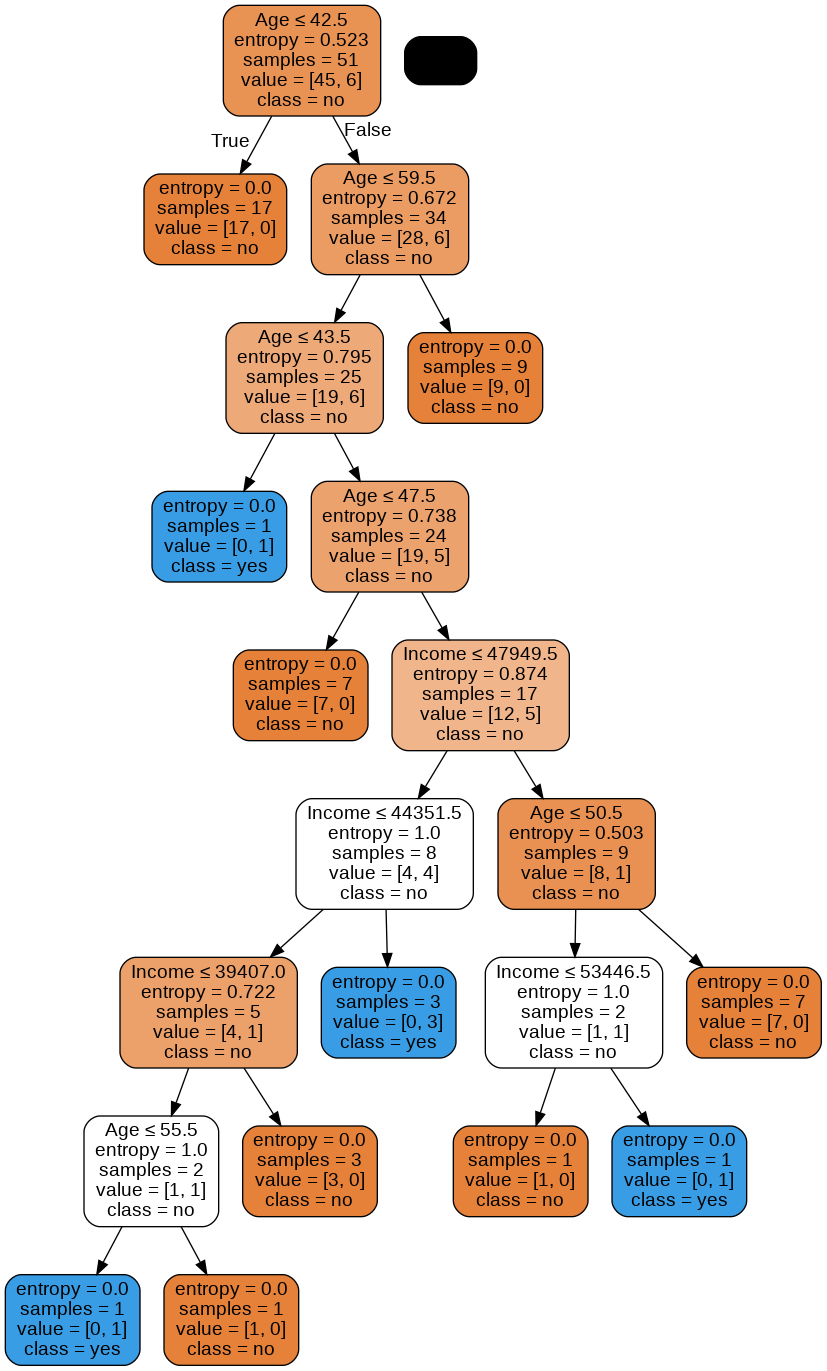

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('illness.png')
Image(graph.create_png())

In [ ]:
#Predict a new value
df_toyillpredict = df_toy.iloc[151:201, [0,1,2,3,4,5]]
feature_cols=['City','Gender','Age','Income']
X_sample = df_toyillpredict[feature_cols]
y_sample = df_toyillpredict['Illness'] 


X_sample =pd.get_dummies(X_sample)


for i in X_sample.index:
  # print(i)
  # print(y_sample[i])
  X_test =pd.DataFrame({'Age':[X_sample['Age'][i]],
                      'Income':[X_sample['Income'][i]],
                      'City_Dallas':[X_sample['City_Dallas'][i]],
                      'Gender_Female':[X_sample['Gender_Female'][i]],
                      'Gender_Male':[X_sample['Gender_Male'][i]]
                      
                      })

  y_predict= model.predict(X_test)
  print("No. ", i, " Sample data = ", "['" + y_sample[i] + "']", " Predicted data = ", y_predict, end='')
  if y_sample[i] == y_predict:
    print("  Prediction precision = ['correct']")
  else:
    print("  Prediction precision = ['Incorrect']")
  

No.  151  Sample data =  ['No']  Predicted data =  ['Yes']  Prediction precision = ['Incorrect']
No.  152  Sample data =  ['No']  Predicted data =  ['No']  Prediction precision = ['correct']
No.  153  Sample data =  ['Yes']  Predicted data =  ['No']  Prediction precision = ['Incorrect']
No.  154  Sample data =  ['Yes']  Predicted data =  ['No']  Prediction precision = ['Incorrect']
No.  155  Sample data =  ['No']  Predicted data =  ['No']  Prediction precision = ['correct']
No.  156  Sample data =  ['No']  Predicted data =  ['Yes']  Prediction precision = ['Incorrect']
No.  157  Sample data =  ['No']  Predicted data =  ['Yes']  Prediction precision = ['Incorrect']
No.  158  Sample data =  ['No']  Predicted data =  ['No']  Prediction precision = ['correct']
No.  159  Sample data =  ['No']  Predicted data =  ['No']  Prediction precision = ['correct']
No.  160  Sample data =  ['Yes']  Predicted data =  ['No']  Prediction precision = ['Incorrect']
No.  161  Sample data =  ['No']  Predicted

**Explanation**
